<div align="center">
 <img src="https://mlogu6g7z5ex.i.optimole.com/cb:RF8R~518a6/w:auto/h:auto/q:90/https://facens.br/wp-content/uploads/2021/03/logo-f.png" width="150px">
 <h1> Dataviz - Especialização em Ciência de Dados - FACENS<br><br>
    Exercício 3
 </h1>
</div>
<br><br>

Utilizar dataset BlackFriday

* **Aluno:** Andreia Brito Castro Leite
* **RA:** 226019

In [ ]:
#Biblioteca

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import plotly
import plotly.offline as py
import plotly.graph_objs as go



## Questão 1

Construa um ou mais gráficos do tipo violino que permita(m) a comparação entre o valor gasto e a idade dos compradores.

In [ ]:
df = pd.read_csv('/content/BlackFriday.csv', delimiter=",")
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [ ]:
#Descrição dos valores de compra
df['Purchase'].describe()

count    537577.000000
mean       9333.859853
std        4981.022133
min         185.000000
25%        5866.000000
50%        8062.000000
75%       12073.000000
max       23961.000000
Name: Purchase, dtype: float64

In [ ]:
#Quantidade de registros
print(len(df))

537577


In [ ]:
#Quantidade de registros por Frequência das idades
# Use a função value_counts() para calcular a tabela de frequência
tabela_frequencia_idade = df['Age'].value_counts().reset_index()
tabela_frequencia_idade.columns = ['Idade', 'Frequência']

print(tabela_frequencia_idade)

   Idade  Frequência
0  26-35      214690
1  36-45      107499
2  18-25       97634
3  46-50       44526
4  51-55       37618
5    55+       20903
6   0-17       14707


In [ ]:
#Gráfico de registros de gastos por idade
data = [go.Bar(
            x=tabela_frequencia_idade.Frequência,
            y=tabela_frequencia_idade.Idade,
            orientation='h')]

layout = go.Layout(
    title='Gráfico de registros gastos por Frequência de Idade',
    xaxis=dict(title='Frequência Registros'),
    yaxis=dict(title='Idade')
)

fig = go.Figure(data=data, layout=layout)

py.iplot(fig)



**Comentário:** A Faixa etária com mais registros de gastos foi é a de 26-35

In [ ]:
#Soma dos valores gastos conforme idade
soma_valores = df.groupby(['Age'])['Purchase'].sum().sort_values(ascending=False).reset_index()

soma_valores.columns = ['Idade', 'Soma_Valores']
print(soma_valores)


   Idade  Soma_Valores
0  26-35    1999749106
1  36-45    1010649565
2  18-25     901669280
3  46-50     413418223
4  51-55     361908356
5    55+     197614842
6   0-17     132659006


In [ ]:
#Gráfico que representa a soma dos gastos por faixa etária

data = [go.Bar(
            x=soma_valores.Soma_Valores,
            y=soma_valores.Idade,
            orientation='h')]

layout = go.Layout(
    title='Gráfico com o Total de Gastos por Frequência de Idade',
    xaxis=dict(title='Total de Valores gastos'),
    yaxis=dict(title='Idade')
)

fig = go.Figure(data=data, layout=layout)

py.iplot(fig)

**Comentário:** A Faixa etária dos 26-35, também é a maior soma de gastos.

<Axes: xlabel='Age', ylabel='Purchase'>

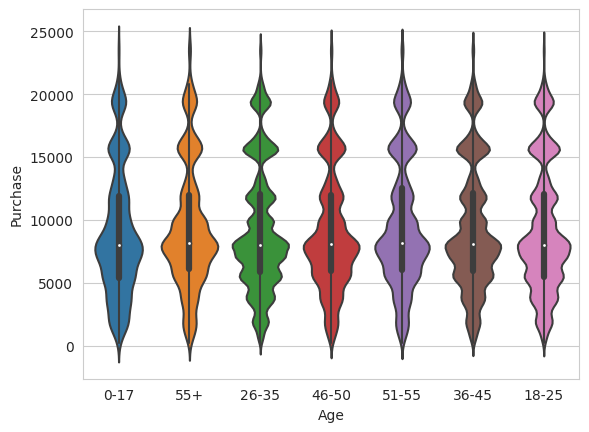

In [ ]:
#Gráfico de violino, comparando os valores gastos e as faixas etárias.
sns.set_style('whitegrid')

sns.violinplot(x=df.Age, y=df.Purchase, data=df.head(100))


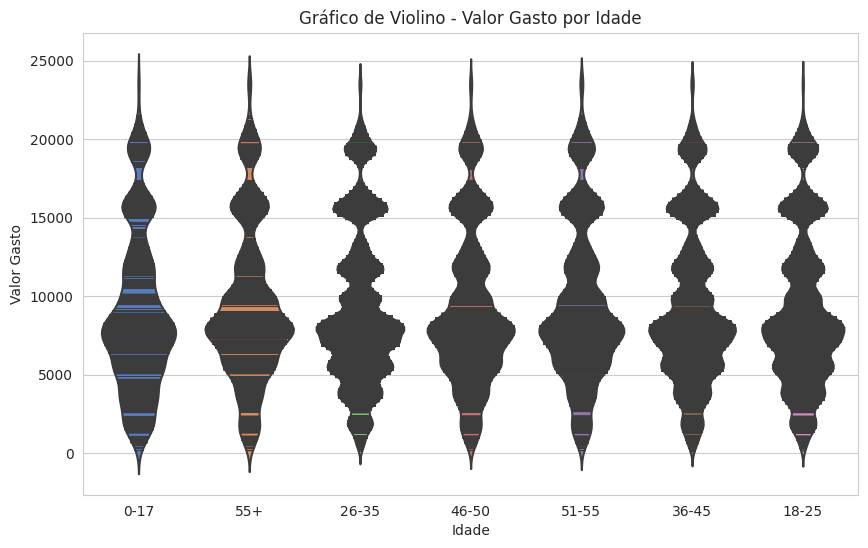

In [ ]:
# Crie o gráfico de violino
plt.figure(figsize=(10, 6))
sns.violinplot(x=df.Age, y=df.Purchase, data=df, inner='stick', palette='muted')
plt.xlabel('Idade')
plt.ylabel('Valor Gasto')
plt.title('Gráfico de Violino - Valor Gasto por Idade')

# Exiba o gráfico
plt.show()

## Analisando:

A Classe 26-35, é a classe que tem mais registros de compras e também é a que tem maior Total de gastos.

## Questão 2

Represente graficamente os Top N produtos mais comprados, onde N <= 15

In [ ]:
#Tratando a base
print("Dados Faltantes:")
df.isnull().sum().sort_values(ascending=False)

Dados Faltantes:


User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64

In [ ]:
# Substitua os valores ausentes por 0 na coluna 'Product_Category_2'
df['Product_Category_2'] = df['Product_Category_2'].fillna(0)

In [ ]:
# Substitua os valores ausentes por 0 na coluna 'Product_Category_3'
df['Product_Category_3'] = df['Product_Category_3'].fillna(0)

In [ ]:
print("Dados Faltantes:")
df.isnull().sum().sort_values(ascending=False)

Dados Faltantes:


User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64

In [ ]:
# Tabela de frequência para 'Product_Category_1'
tabela_freq_categoria_1 = df['Product_Category_1'].value_counts().reset_index()
tabela_freq_categoria_1.columns = ['Product_Category_1', 'Frequencia']


# Imprimir a tabela de frequência para 'Product_Category_1':
print("Tabela de Frequência para Product_Category_1:\n")
print(tabela_freq_categoria_1)


Tabela de Frequência para Product_Category_1:

    Product_Category_1  Frequencia
0                    5      148592
1                    1      138353
2                    8      112132
3                   11       23960
4                    2       23499
5                    6       20164
6                    3       19849
7                    4       11567
8                   16        9697
9                   15        6203
10                  13        5440
11                  10        5032
12                  12        3875
13                   7        3668
14                  18        3075
15                  14        1500
16                  17         567
17                   9         404


## Comentário: Os produtos da Categoria Produto 1, mais comprados(5, 1, 8, 11, 2)

In [ ]:
df.dtypes

User_ID                        int64
Product_ID                    object
Gender                        object
Age                           object
Occupation                     int64
City_Category                 object
Stay_In_Current_City_Years    object
Marital_Status                 int64
Product_Category_1             int64
Product_Category_2             int64
Product_Category_3             int64
Purchase                       int64
dtype: object

In [ ]:
#Verificando a coluna 'Product_Category_2'
df['Product_Category_2']

0          0
1          6
2          0
3         14
4          0
          ..
537572     2
537573    15
537574    15
537575     0
537576     8
Name: Product_Category_2, Length: 537577, dtype: int64

In [ ]:
# Converter a coluna 'Product_Category_2' em números inteiros
df['Product_Category_2'] = df['Product_Category_2'].astype(int)

# Verificar o tipo de dados após a conversão
print(df.dtypes)

User_ID                        int64
Product_ID                    object
Gender                        object
Age                           object
Occupation                     int64
City_Category                 object
Stay_In_Current_City_Years    object
Marital_Status                 int64
Product_Category_1             int64
Product_Category_2             int64
Product_Category_3             int64
Purchase                       int64
dtype: object


In [ ]:
df['Product_Category_2']

0          0
1          6
2          0
3         14
4          0
          ..
537572     2
537573    15
537574    15
537575     0
537576     8
Name: Product_Category_2, Length: 537577, dtype: int64

In [ ]:
# Filtrando os registros onde 'Product_Category_2' é diferente de zero
#Coloquei esse filtro, porque substitui os valores ausentes por 0
df_filtered = df[df['Product_Category_2'] != 0]

# Tabela de frequência para 'Product_Category_2'
tabela_freq_categoria_2 = df_filtered ['Product_Category_2'].value_counts().reset_index()
tabela_freq_categoria_2.columns = ['Product_Category_2', 'Frequencia']


# Tabela de frequência para 'Product_Category_2':
print("\nTabela de Frequência para Product_Category_2:\n")
print(tabela_freq_categoria_2)


Tabela de Frequência para Product_Category_2:

    Product_Category_2  Frequencia
0                    8       63058
1                   14       54158
2                    2       48481
3                   16       42602
4                   15       37317
5                    5       25874
6                    4       25225
7                    6       16251
8                   11       13945
9                   17       13130
10                  13       10369
11                   9        5591
12                  12        5419
13                  10        2991
14                   3        2835
15                  18        2730
16                   7         615


## Comentário: Os produtos da Categoria Produto 2, mais comprados(8, 14, 2, 16, 15)

In [ ]:
#Verificando a coluna 'Product_Category_2'
df['Product_Category_3']

0          0
1         14
2          0
3          0
4          0
          ..
537572     0
537573    16
537574     0
537575     0
537576     0
Name: Product_Category_3, Length: 537577, dtype: int64

In [ ]:
# Converter a coluna 'Product_Category_3' em números inteiros
df['Product_Category_3'] = df['Product_Category_3'].astype(int)

# Verificar o tipo de dados após a conversão
print(df.dtypes)

User_ID                        int64
Product_ID                    object
Gender                        object
Age                           object
Occupation                     int64
City_Category                 object
Stay_In_Current_City_Years    object
Marital_Status                 int64
Product_Category_1             int64
Product_Category_2             int64
Product_Category_3             int64
Purchase                       int64
dtype: object


In [ ]:
df['Product_Category_3']

0          0
1         14
2          0
3          0
4          0
          ..
537572     0
537573    16
537574     0
537575     0
537576     0
Name: Product_Category_3, Length: 537577, dtype: int64

In [ ]:
# Filtrando os registros onde 'Product_Category_2' é diferente de zero
#Coloquei esse filtro, porque substitui os valores ausentes por 0
df_filtered = df[df['Product_Category_3'] != 0]

# Crie uma tabela de frequência para 'Product_Category_3'
tabela_freq_categoria_3 = df_filtered['Product_Category_3'].value_counts().reset_index()
tabela_freq_categoria_3.columns = ['Product_Category_3', 'Frequencia']


# Exemplo de como imprimir a tabela de frequência para 'Product_Category_3':
print("\nTabela de Frequência para Product_Category_3:\n")
print(tabela_freq_categoria_3)


Tabela de Frequência para Product_Category_3:

    Product_Category_3  Frequencia
0                   16       32148
1                   15       27611
2                   14       18121
3                   17       16449
4                    5       16380
5                    8       12384
6                    9       11414
7                   12        9094
8                   13        5385
9                    6        4818
10                  18        4563
11                   4        1840
12                  11        1773
13                  10        1698
14                   3         600


## Comentário: Os produtos da Categoria Produto 2, mais comprados(16, 15, 14, 17, 5)

In [ ]:
# Contar a quantidade de registros das colunas
quantidade_registros1 = df['Product_Category_1'].nunique()
quantidade_registros2 = df['Product_Category_2'].nunique()
quantidade_registros3 = df['Product_Category_3'].nunique()

print(quantidade_registros1)
print(quantidade_registros2)
print(quantidade_registros3)

18
18
16


Primeira tentativa de comparação de venda por produto.

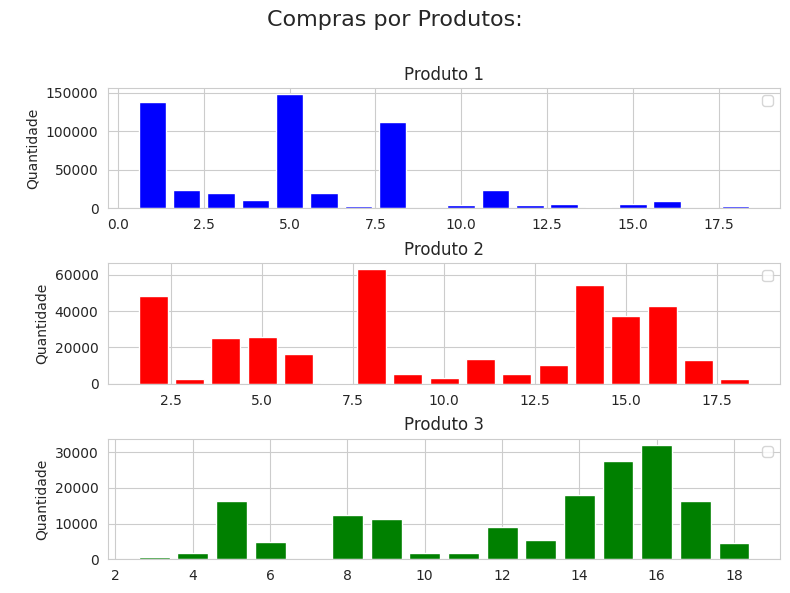

In [ ]:
# Figura com 3 subplots de barras
fig, ax = plt.subplots(3, 1, figsize=(8, 6))

# Gráfico de barras 1
#['Product_Category_1', 'Frequência']
ax[0].bar(tabela_freq_categoria_1.Product_Category_1, tabela_freq_categoria_1.Frequencia, color='blue')
ax[0].set_ylabel('\nQuantidade')
ax[0].set_title('Produto 1')
ax[0].legend()

# Gráfico de barras 2
ax[1].bar(tabela_freq_categoria_2.Product_Category_2, tabela_freq_categoria_2.Frequencia, color='red')
ax[1].set_ylabel('Quantidade')
ax[1].set_title('Produto 2')
ax[1].legend()

# Gráfico de barras 3
ax[2].bar(tabela_freq_categoria_3.Product_Category_3, tabela_freq_categoria_3.Frequencia, color='green')
ax[2].set_ylabel('Quantidade')
ax[2].set_title('Produto 3')
ax[2].legend()

# Espaço entre os gráficos
plt.tight_layout()

# Espaço entre os subplots e os títulos
plt.subplots_adjust(wspace=0.85, top=0.85)  # Ajustar o espaçamento horizontal e o espaço superior

# Título geral para a figura
plt.suptitle('Compras por Produtos:\n', fontsize=16)

# Mostrar os gráficos
plt.show()

# Comentário: Eixo y dos gráficos estão em escalas diferentes

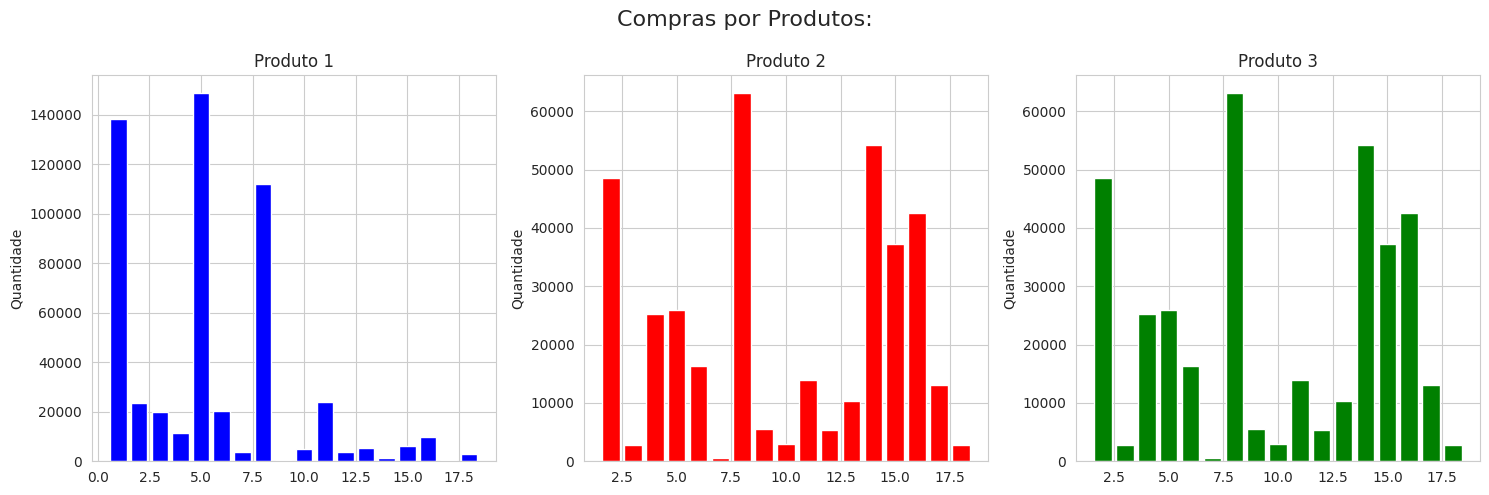

In [ ]:
# Figura com 3 subplots de barras
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Gráfico de barras 1
axs[0].bar(tabela_freq_categoria_1.Product_Category_1, tabela_freq_categoria_1.Frequencia, color='blue')
axs[0].set_ylabel('Quantidade')
axs[0].set_title('Produto 1')

# Gráfico de barras 2
axs[1].bar(tabela_freq_categoria_2.Product_Category_2, tabela_freq_categoria_2.Frequencia, color='red')
axs[1].set_ylabel('Quantidade')
axs[1].set_title('Produto 2')

# Gráfico de barras 3
axs[2].bar(tabela_freq_categoria_2.Product_Category_2, tabela_freq_categoria_2.Frequencia, color='green')
axs[2].set_ylabel('Quantidade')
axs[2].set_title('Produto 3')

# Ajustar o espaço entre os subplots
plt.tight_layout()

# Espaço entre os subplots e os títulos
plt.subplots_adjust(top=0.85)  # Ajustar o espaçamento horizontal e o espaço superior

# Título geral para a figura
plt.suptitle('Compras por Produtos:\n', fontsize=16)

# Mostrar os gráficos
plt.show()

Segunda tentativa, como os gráficos anterioes o eixo Y, estão em escalas diferentes, criei essa database, para visualizar melhor a comparação de registros de venda por produtos.

In [ ]:
# Combinação dos DataFrames em um único DataFrame usando merge
combined_df = tabela_freq_categoria_1.merge(tabela_freq_categoria_2, left_on='Product_Category_1', right_on='Product_Category_2')
combined_df = combined_df.merge(tabela_freq_categoria_3, left_on='Product_Category_1', right_on='Product_Category_3')

# Renomear colunas
combined_df.columns = ['Prod1', 'Frequencia_1', 'Prod2', 'Frequencia_2', 'Prod3', 'Frequencia_3']
combined_df


,Prod1,Frequencia_1,Prod2,Frequencia_2,Prod3,Frequencia_3
0,5,148592,5,25874,5,16380
1,8,112132,8,63058,8,12384
2,11,23960,11,13945,11,1773
3,6,20164,6,16251,6,4818
4,3,19849,3,2835,3,600
5,4,11567,4,25225,4,1840
6,16,9697,16,42602,16,32148
7,15,6203,15,37317,15,27611
8,13,5440,13,10369,13,5385
9,10,5032,10,2991,10,1698


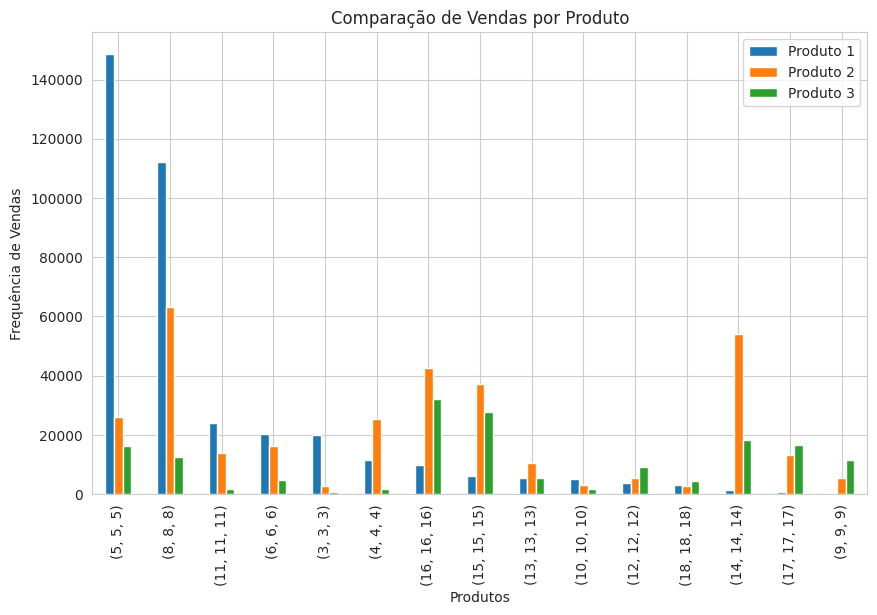

In [ ]:
# Comparando vendas por produto, como índice para facilitar a criação do gráfico
combined_df.set_index(['Prod1', 'Prod2', 'Prod3'], inplace=True)

# Plotar um gráfico de barras para comparar as frequências
combined_df.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Produtos')
plt.ylabel('Frequência de Vendas')
plt.title('Comparação de Vendas por Produto')
plt.legend(["Produto 1", "Produto 2", "Produto 3"])
plt.show()

**Comentário:** Criei esses gráficos para visualizar a venda dos produtos.

## Questão 3

Represente graficamente a distribuição dos valores gastos em cada faixa etária dos compradores associados às 5 ocupações mais frequentes.

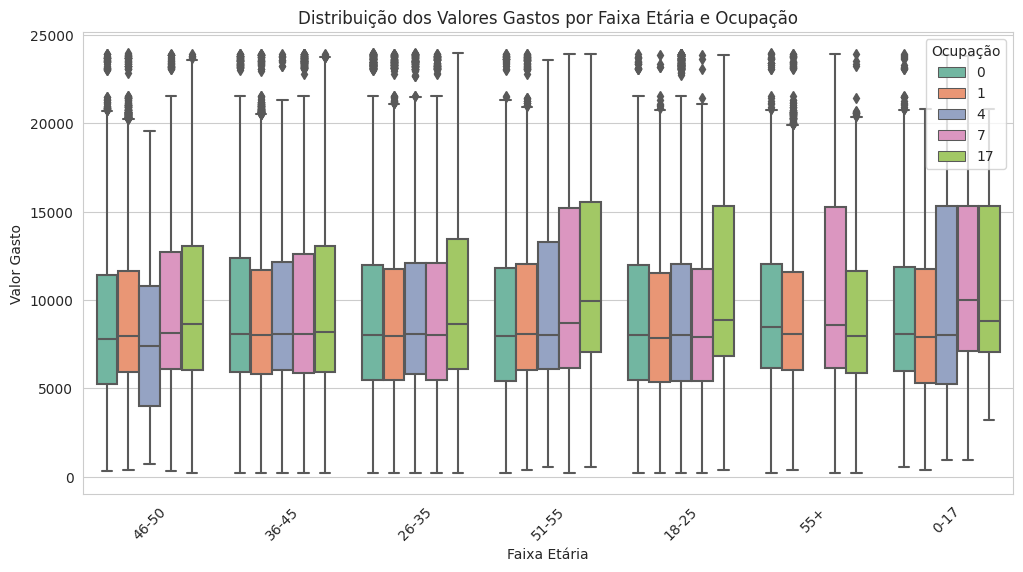

In [ ]:
# Filtro das 5 ocupações mais frequentes
ocupacoes_frequentes = df['Occupation'].value_counts().head(5).index.tolist()
df_filtrado_ocupacao = df[df['Occupation'].isin(ocupacoes_frequentes)]
df_filtrado_ocupacao

# Gráfico de caixa para a distribuição dos valores gastos por faixa etária
plt.figure(figsize=(12, 6))
sns.boxplot(x='Age', y='Purchase', hue='Occupation', data=df_filtrado_ocupacao, palette='Set2')
plt.xlabel('Faixa Etária')
plt.ylabel('Valor Gasto')
plt.title('Distribuição dos Valores Gastos por Faixa Etária e Ocupação')
plt.xticks(rotation=45)
plt.legend(title='Ocupação')
plt.show()

## Questão 4

Represente visualmente a relação entre ocupação e estado civil das compras com valor maior que nove mil.

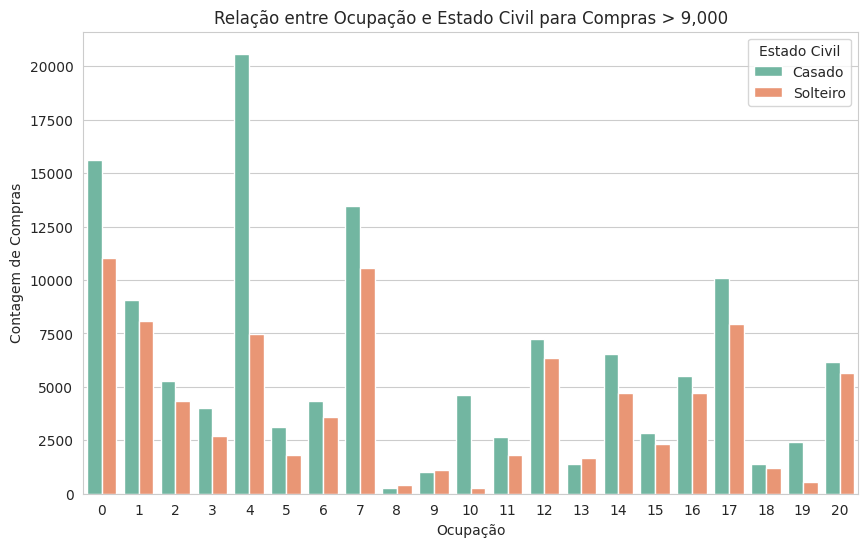

In [ ]:
# Filtrar compras com valor maior que nove mil
df_filtrado = df[df['Purchase'] > 9000]

# Gráfico de barras empilhadas
plt.figure(figsize=(10, 6))
sns.countplot(x='Occupation', hue='Marital_Status', data=df_filtrado, palette='Set2')
plt.xlabel('Ocupação')
plt.ylabel('Contagem de Compras')
plt.title('Relação entre Ocupação e Estado Civil para Compras > 9,000')
plt.legend(title='Estado Civil', labels=['Casado', 'Solteiro'])
plt.show()